In [5]:
import os
import pandas as pd
import numpy as np

# 設定輸出資料夾路徑
output_folder = r"G:\works\Data_archive\8f_behav\open_field\2023June\cropped\DLC_OUTPUT"

# 取得所有.h5檔案路徑
file_paths = [os.path.join(output_folder, f) for f in os.listdir(output_folder) if f.endswith('.h5')]

# 儲存所有檔案的距離和速度
results = {}

# 迴圈處理每個檔案
for file_path in file_paths:
    # 讀取檔案
    df = pd.read_hdf(file_path)
    
    # 選取所有likelihood欄
    likelihood_cols = [col for col in df.columns if 'likelihood' in col]
    
    # 篩選所有部位中likelihood大於0.6的frame
    mask = (df[likelihood_cols] >= 0.6).all(axis=1)
    df_filtered = df[mask]
    
    # 取出spine1和spine2的座標
    spine1_coords = df_filtered['DLC_resnet50_OpenFieldApr28shuffle1_86000']['spine1'][['x', 'y']]
    spine2_coords = df_filtered['DLC_resnet50_OpenFieldApr28shuffle1_86000']['spine2'][['x', 'y']]
    
    # 計算中點的座標
    midpoint_coords = (spine1_coords + spine2_coords) / 2
    
    # 計算每個時間點的移動距離
    distances = np.sqrt(((midpoint_coords - midpoint_coords.shift()) ** 2).sum(axis=1))
    
    # 計算總移動距離
    total_distance = int(distances.sum() / 480 * 40)
    
    # 計算相鄰frame中點座標的變化量
    coord_diff = np.abs(np.diff(midpoint_coords, axis=0))

    # 找出變化量大於設定 pixel的frame，並計算符合條件的frame數量 (計算moving time)
    num_still_frames = np.sum(np.all(coord_diff >= 0.24, axis=1))
    moving_time = num_still_frames*40/1000
    
    # 計算平均速度
    avg_speed = round(total_distance / moving_time, 2)

    #計算加速度
    speed_diff = np.abs(np.diff(distances, axis=0))
    acceleration = np.abs(np.diff(speed_diff, axis=0))
    avg_acceleration = round(acceleration.mean()/(1/25), 2)

    # 儲存結果
    file_name = os.path.basename(file_path)
    prefix = 'openfield_'
    suffix = 'DLC_resnet50_OpenFieldApr28shuffle1_86000.h5'
    trimmed_name = file_name[len(prefix):len(file_name)-len(suffix)]
    results[trimmed_name] = {'distance': total_distance, 'speed': avg_speed, 'acceleration': avg_acceleration, 'moving_time' : moving_time}
    
    

# 將結果輸出到 excel 檔案中
df = pd.DataFrame.from_dict(results, orient='index')
df.index.name = '檔名'
df.columns = ['距離', '速度', '加速度', '運動時間']
df.to_excel('output.xlsx')

# 輸出結果
print(df)

                           距離     速度    加速度    運動時間
檔名                                                 
230608_1st_1213A_saline  3253   7.94  17.74  409.64
230608_1st_1213B_saline  4112   8.30  16.67  495.36
230608_1st_1213C_CTZ     2623   8.65  25.23  303.20
230608_1st_1213D_CTZ     4289   8.63  20.82  497.24
230608_1st_1213E_CTZ     3786   8.77  21.61  431.64
230608_1st_1219A_saline  2923   7.72  13.97  378.68
230608_1st_1219B_saline  5086   8.57  18.93  593.72
230608_1st_1219D_CTZ     4676   8.54  21.04  547.32
230608_1st_1219E_CTZ     3068   8.76  22.60  350.40
230608_1st_G290_saline   5424   9.01  19.67  601.72
230608_1st_G291_CTZ      5281   8.41  18.70  628.28
230608_1st_G707_saline   4658   8.13  15.03  572.84
230608_1st_G720_saline   3786   8.19  14.51  462.20
230608_1st_G721_CTZ      4704   8.82  23.65  533.16
230608_1st_G724_CTZ      1825   9.93  22.72  183.84
230611_2nd_1213A_CTZ     3624   7.93  18.26  456.72
230611_2nd_1213B_CTZ     5517  10.46  25.53  527.44
230611_2nd_1

In [5]:
import os
import pandas as pd
import numpy as np

# 設定輸出資料夾路徑
output_folder = r"G:\works\Data_archive\8f_behav\open_field\2023June\cropped\DLC_OUTPUT"

# 取得所有.h5檔案路徑
file_paths = [os.path.join(output_folder, f) for f in os.listdir(output_folder) if f.endswith('.h5')]

# 儲存所有檔案的距離和速度
results = {}

# 迴圈處理每個檔案
for file_path in file_paths:
    # 讀取檔案
    df = pd.read_hdf(file_path)
    
    # 選取所有likelihood欄
    likelihood_cols = [col for col in df.columns if 'likelihood' in col]
    
    # 篩選所有部位中likelihood小於0.6的frame
    mask = (df[likelihood_cols] >= 0.6).all(axis=1)
    df_filtered = df[mask]
    
    # 取出spine1和spine2的座標
    spine1_coords = df_filtered['DLC_resnet50_OpenFieldApr28shuffle1_86000']['spine1'][['x', 'y']]
    spine2_coords = df_filtered['DLC_resnet50_OpenFieldApr28shuffle1_86000']['spine2'][['x', 'y']]
    
    # 計算中點的座標
    midpoint_coords = (spine1_coords + spine2_coords) / 2
    
    # 計算每個時間點的移動距離
    distances = np.sqrt(((midpoint_coords - midpoint_coords.shift()) ** 2).sum(axis=1))
    
    # 計算總移動距離
    total_distance = int(distances.sum() / 480 * 40)
    
    # 計算平均速度
    avg_speed = round(total_distance / 1200, 2)
    
    # 計算相鄰frame中點座標的變化量
    coord_diff = np.abs(np.diff(midpoint_coords, axis=0))

    # 找出變化量大於設定 pixel的frame，並計算符合條件的frame數量 (計算moving time)
    num_still_frames = np.sum(np.all(coord_diff >= 0.24, axis=1))
    moving_time = num_still_frames * 40 / 1000
    
    # 儲存結果
    file_name = os.path.basename(file_path)
    prefix = 'openfield_'
    suffix = 'DLC_resnet50_OpenFieldApr28shuffle1_70000.h5'
    trimmed_name = file_name[len(prefix):len(file_name)-len(suffix)]
    
    # 提取日期和treatment的資訊
    parts = trimmed_name.split('_')
    date = parts[0]
    treatment = parts[-1]
    
    if date not in results:
        results[date] = {}
    
    if treatment not in results[date]:
        results[date][treatment] = []
    
    results[date][treatment].append({'distance': total_distance, 'speed': avg_speed, 'moving_time': moving_time})

# 將結果輸出到 Excel 檔案中
writer = pd.ExcelWriter('open_field_result.xlsx')

# 分組寫入不同分頁
for date, date_data in results.items():
    for treatment, treatment_data in date_data.items():
        df = pd.DataFrame.from_dict(treatment_data)
        sheet_name = f"{date}_{treatment}"
        df.to_excel(writer, sheet_name=sheet_name, index=False)

# 保存 Excel 文件
writer.save()


In [11]:
#read datas
import os
import pandas as pd
from tkinter import Tk, filedialog

#select file
def select_files_and_get_paths():
    root = Tk()
    root.attributes('-topmost', True)  # 將主視窗設置為最上層
    root.withdraw()

    file_paths = []

    while True:
        files = filedialog.askopenfilenames(parent=root, title='選擇資料檔案', filetypes=[('CSV files', '*.csv')])
        if not files:
            break
        file_paths.extend(files)

    return file_paths

data_file_paths = select_files_and_get_paths()

all_raw_df = {}

for index, data_file_dir in enumerate(data_file_paths):

    df = pd.read_csv(data_file_dir, true_values=['TRUE'], false_values=['FALSE'], low_memory=False, header=None)

    all_raw_df[index] = df


In [3]:
#data processing
def extract_spine_data(df, n):
    # 提取'spine2'
    spine2_columns = df.iloc[:, [13, 14, 15]]
    spine2_columns.columns = spine2_columns.iloc[2]

    # 删除前三列
    spine2_columns = spine2_columns.iloc[3:, :]

    # 移除likelihood過低的frame
    spine2_columns['x'] = pd.to_numeric(spine2_columns['x'], errors='coerce')
    spine2_columns['y'] = pd.to_numeric(spine2_columns['y'], errors='coerce')
    spine2_columns['likelihood'] = pd.to_numeric(spine2_columns['likelihood'], errors='coerce')
    spine2_columns = spine2_columns.dropna()
    spine2_columns = spine2_columns[spine2_columns['likelihood'] >= 0.9]

    # 添加索引以方便downsampling
    spine2_columns.reset_index(drop=True, inplace=True)

    # Downsampling: 每筆資料至少間隔n個frame
    downsampled_spine2_columns = spine2_columns.iloc[::n, :]

    # 提取'spine2'的x和y座標
    spine2_x = downsampled_spine2_columns['x']
    spine2_y = downsampled_spine2_columns['y']

    return spine2_x, spine2_y


def CombineData(df):
    x = pd.DataFrame()
    y = pd.DataFrame()

    for index, df in all_raw_df.items():
        new_x, new_y = extract_spine_data(df, 5)
        x = pd.concat([x, new_x])
        y = pd.concat([y, new_y])

    # 將 DataFrame 轉換為 NumPy 數組
    x_np = x.values.flatten()
    y_np = y.values.flatten()

    return x_np, y_np



def PolarCoordinatesOfAngularVelocity(x, y):
    # empty df
    AngularVelocity = pd.DataFrame()

    #換算pixel to cm (Velocity in cm/s)
    x = x / 480 * 40 * 25
    y = y / 480 * 40 * 25

    # 計算每個 frame 之間的差異
    AngularVelocity['x'] = np.append(np.diff(x), 0)
    AngularVelocity['y'] = np.append(np.diff(y), 0)

    AngularVelocity['dX'] = np.append(np.diff(AngularVelocity['x']), 0)
    AngularVelocity['dY'] = np.append(np.diff(AngularVelocity['y']), 0)

    # 轉換為極座標
    AngularVelocity['r'] = np.sqrt(AngularVelocity['x']**2 + AngularVelocity['y']**2)
    AngularVelocity['theta'] = np.arctan2(AngularVelocity['y'], AngularVelocity['x'])

    # 計算角速度
    AngularVelocity['dr'] = np.sqrt(AngularVelocity['dX']**2 + AngularVelocity['dY']**2)
    AngularVelocity['dtheta'] = np.arctan2(AngularVelocity['dY'], AngularVelocity['dX'])

    return AngularVelocity

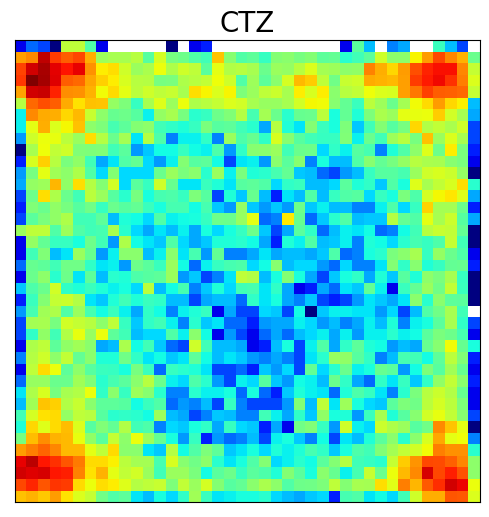

In [13]:
#Spatial distribution heat map

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

x_np, y_np = CombineData(all_raw_df)

plt.figure(figsize=(6, 6))

# 創建熱圖
plt.hist2d(x_np, y_np, bins=(40, 40), cmap=plt.cm.jet, norm=colors.LogNorm())
plt.xticks([])
plt.yticks([])
plt.title('CTZ', fontsize=20)
plt.show()

In [5]:
# 計算分布比例
import numpy as np

pixel_per_cm = 480 / 40
width = 2
field_size = 40  # 場地大小，單位為公分

# 假設的X和Y座標數組
x_coordinates, y_coordinates = CombineData(all_raw_df)

# 修改計算位置類型的函數
def location_type(x, y):
    # 計算每個邊緣的寬度範圍
    distances = [width * i for i in range(field_size // (width*2) )]
    for i, distance in enumerate(distances):
        if x <= distance * pixel_per_cm or x >= (field_size - distance) * pixel_per_cm or y <= distance* pixel_per_cm or y >= (field_size - distance) * pixel_per_cm:
            return f'edge_{i}'
    return 'center'

# 使用向量化函數處理數組
vectorized_location_type = np.vectorize(location_type)
locations = vectorized_location_type(x_coordinates, y_coordinates)

# 計算每個範圍的時間
unique, counts = np.unique(locations, return_counts=True)
location_counts = dict(zip(unique, counts))

# 計算比例
total_time = len(x_coordinates)
ratios = {location: count / total_time for location, count in location_counts.items()}

# 打印每個範圍的比例
for location, ratio in ratios.items():
    print(f"{location} 比例: {ratio:.4f}")

center 比例: 0.0035
edge_1 比例: 0.2454
edge_2 比例: 0.4176
edge_3 比例: 0.1623
edge_4 比例: 0.0642
edge_5 比例: 0.0390
edge_6 比例: 0.0286
edge_7 比例: 0.0192
edge_8 比例: 0.0135
edge_9 比例: 0.0068


C:\Users\Meng-Xuan Liu\AppData\Local\Temp\ipykernel_47840\2465075998.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = ax.pcolormesh(xedges, yedges, counts.T, cmap=plt.cm.jet)


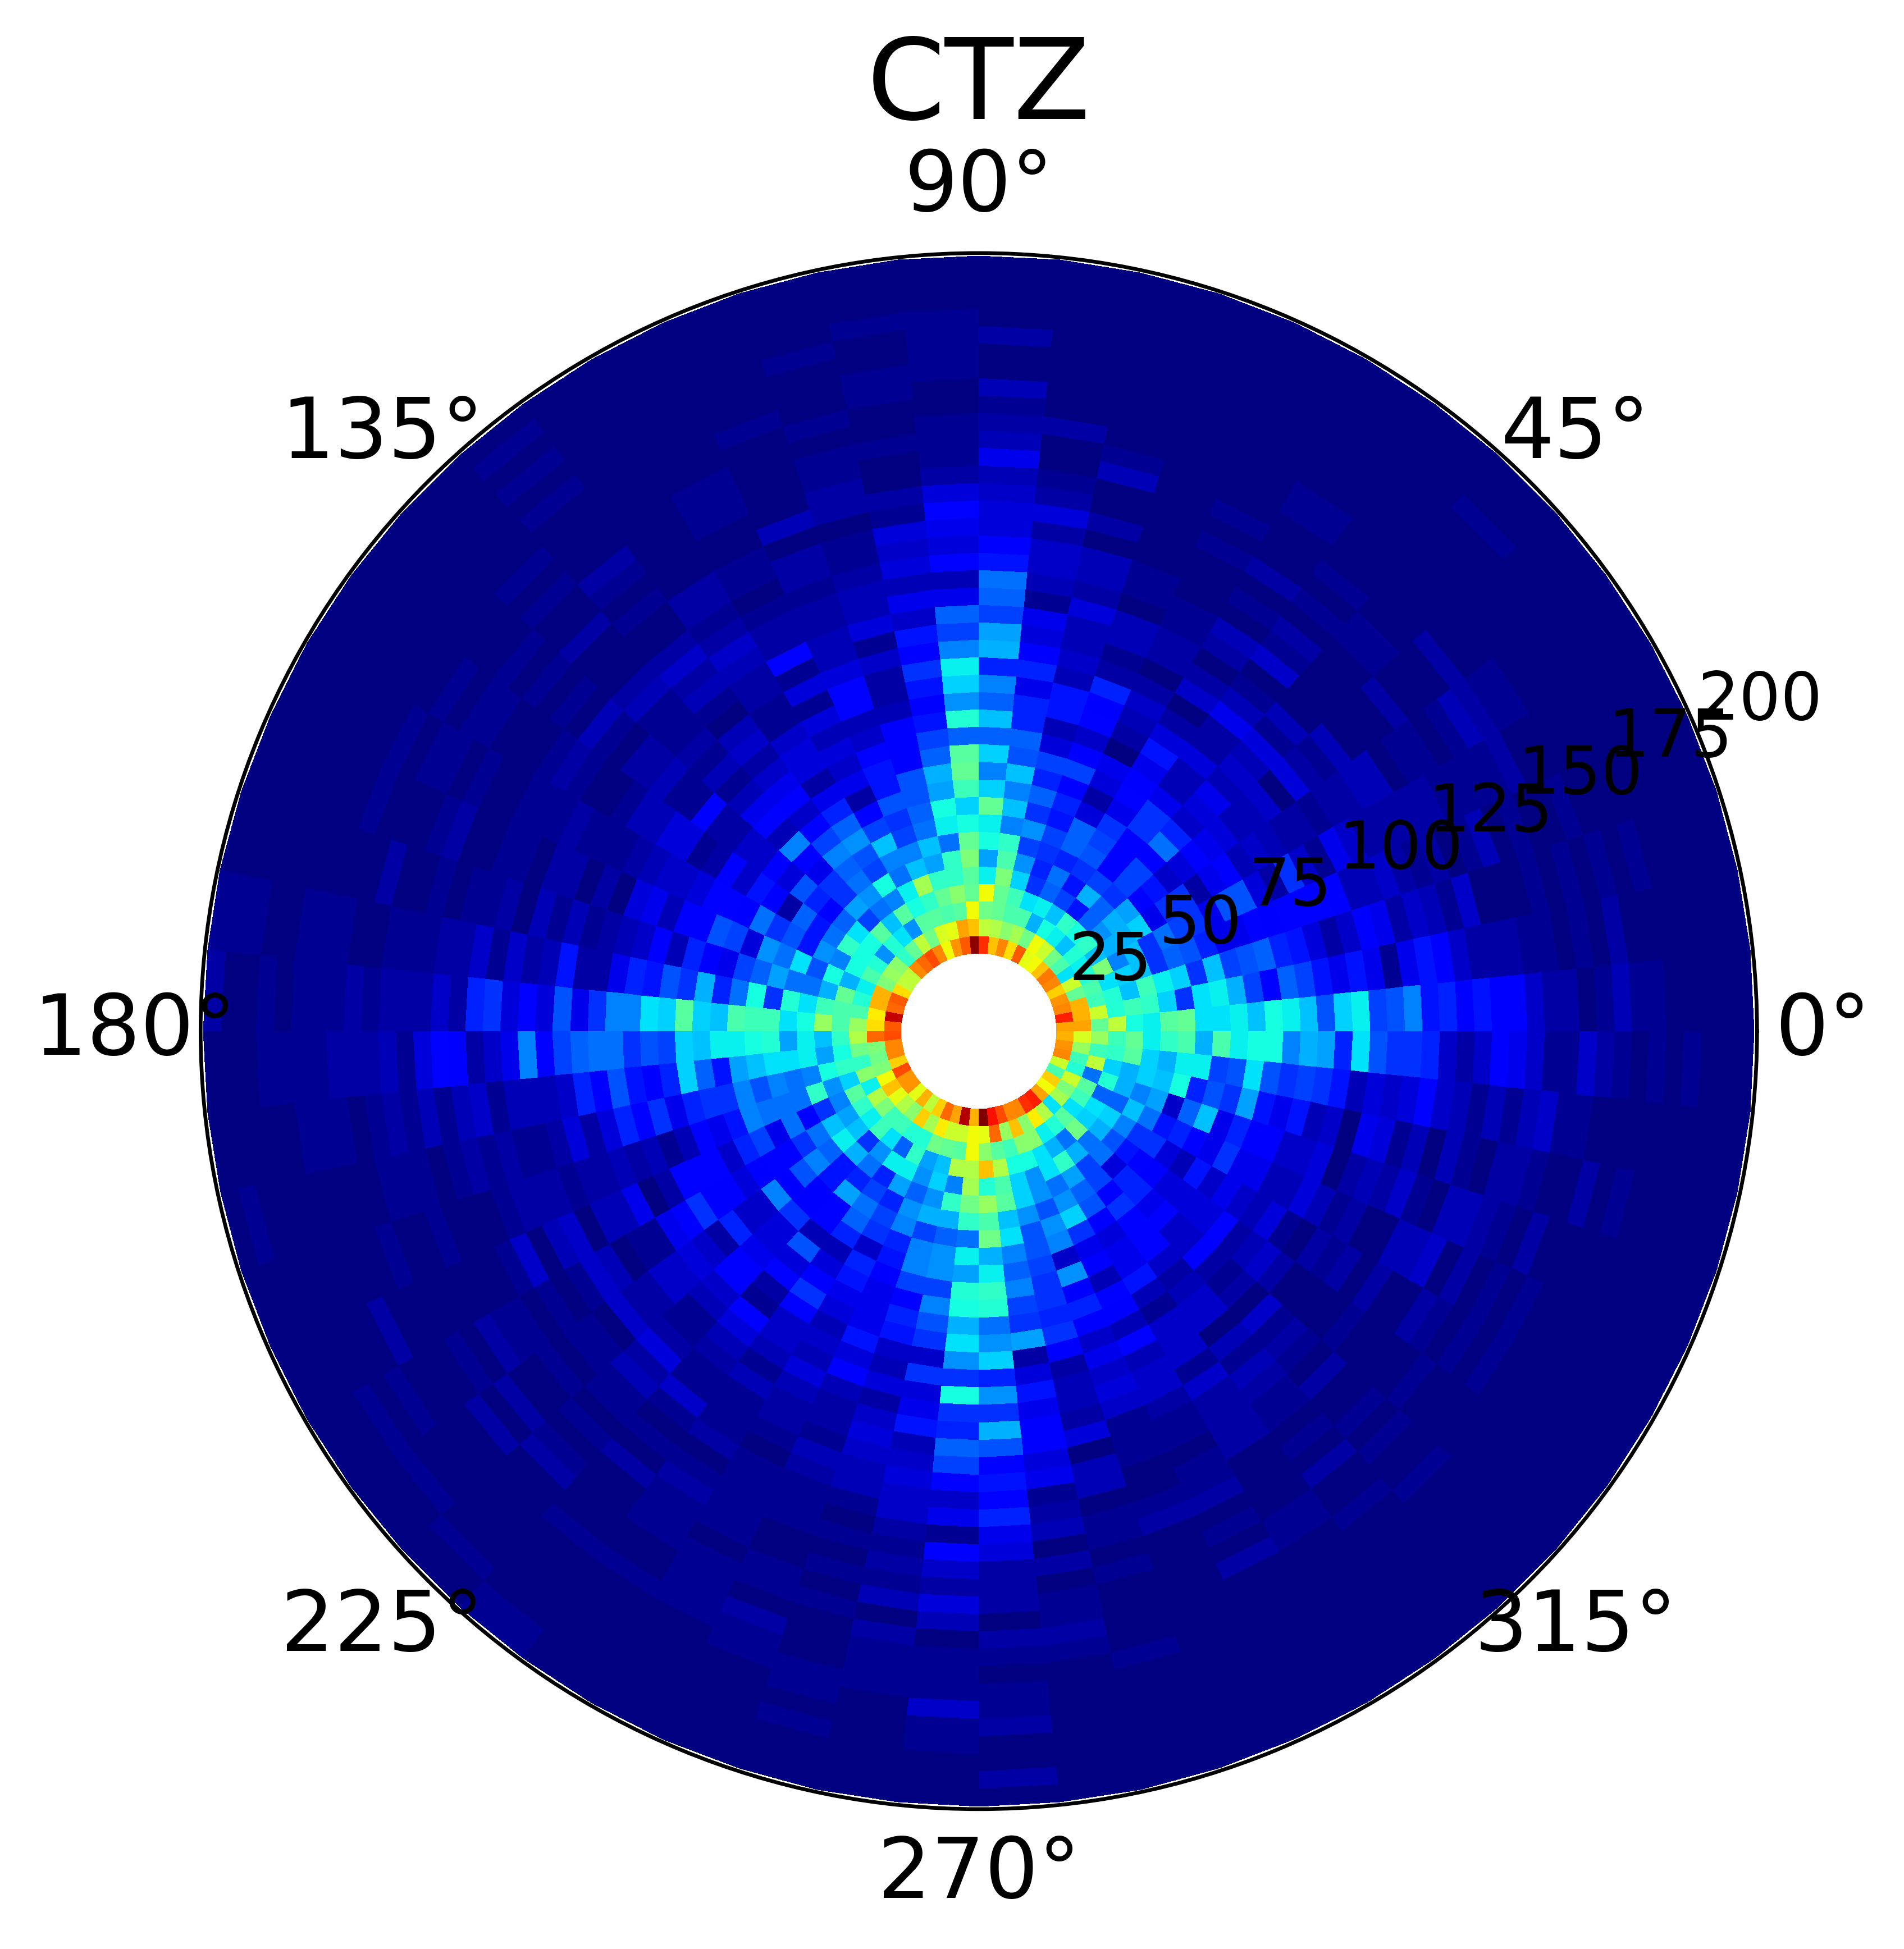

In [6]:
# velocity radial heat map
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt

x, y = CombineData(all_raw_df)

AngularVelocity = PolarCoordinatesOfAngularVelocity(x, y)

AngularVelocity = AngularVelocity[AngularVelocity['r'] >= 20]
AngularVelocity = AngularVelocity[AngularVelocity['r'] <= 200]

plt.figure(figsize=(6, 6), dpi=600)

# 創建一個新的極座標子圖
ax = plt.subplot(111, polar=True)

# 創建一個直方圖。注意，我們需要使用np.histogram2d來計算直方圖的bins和counts
counts, xedges, yedges = np.histogram2d(AngularVelocity['theta'], AngularVelocity['r'], bins=[60, 40])

# 使用ax.pcolormesh來創建徑向熱圖
c = ax.pcolormesh(xedges, yedges, counts.T, cmap=plt.cm.jet)

# Change the font size of the angle labels
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=14)


# 添加顏色條
plt.ylim(0, 200)
plt.title('CTZ', size=24)
plt.show()

C:\Users\Meng-Xuan Liu\AppData\Local\Temp\ipykernel_47840\4035542025.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = ax.pcolormesh(xedges, yedges, counts.T, cmap=plt.cm.jet)


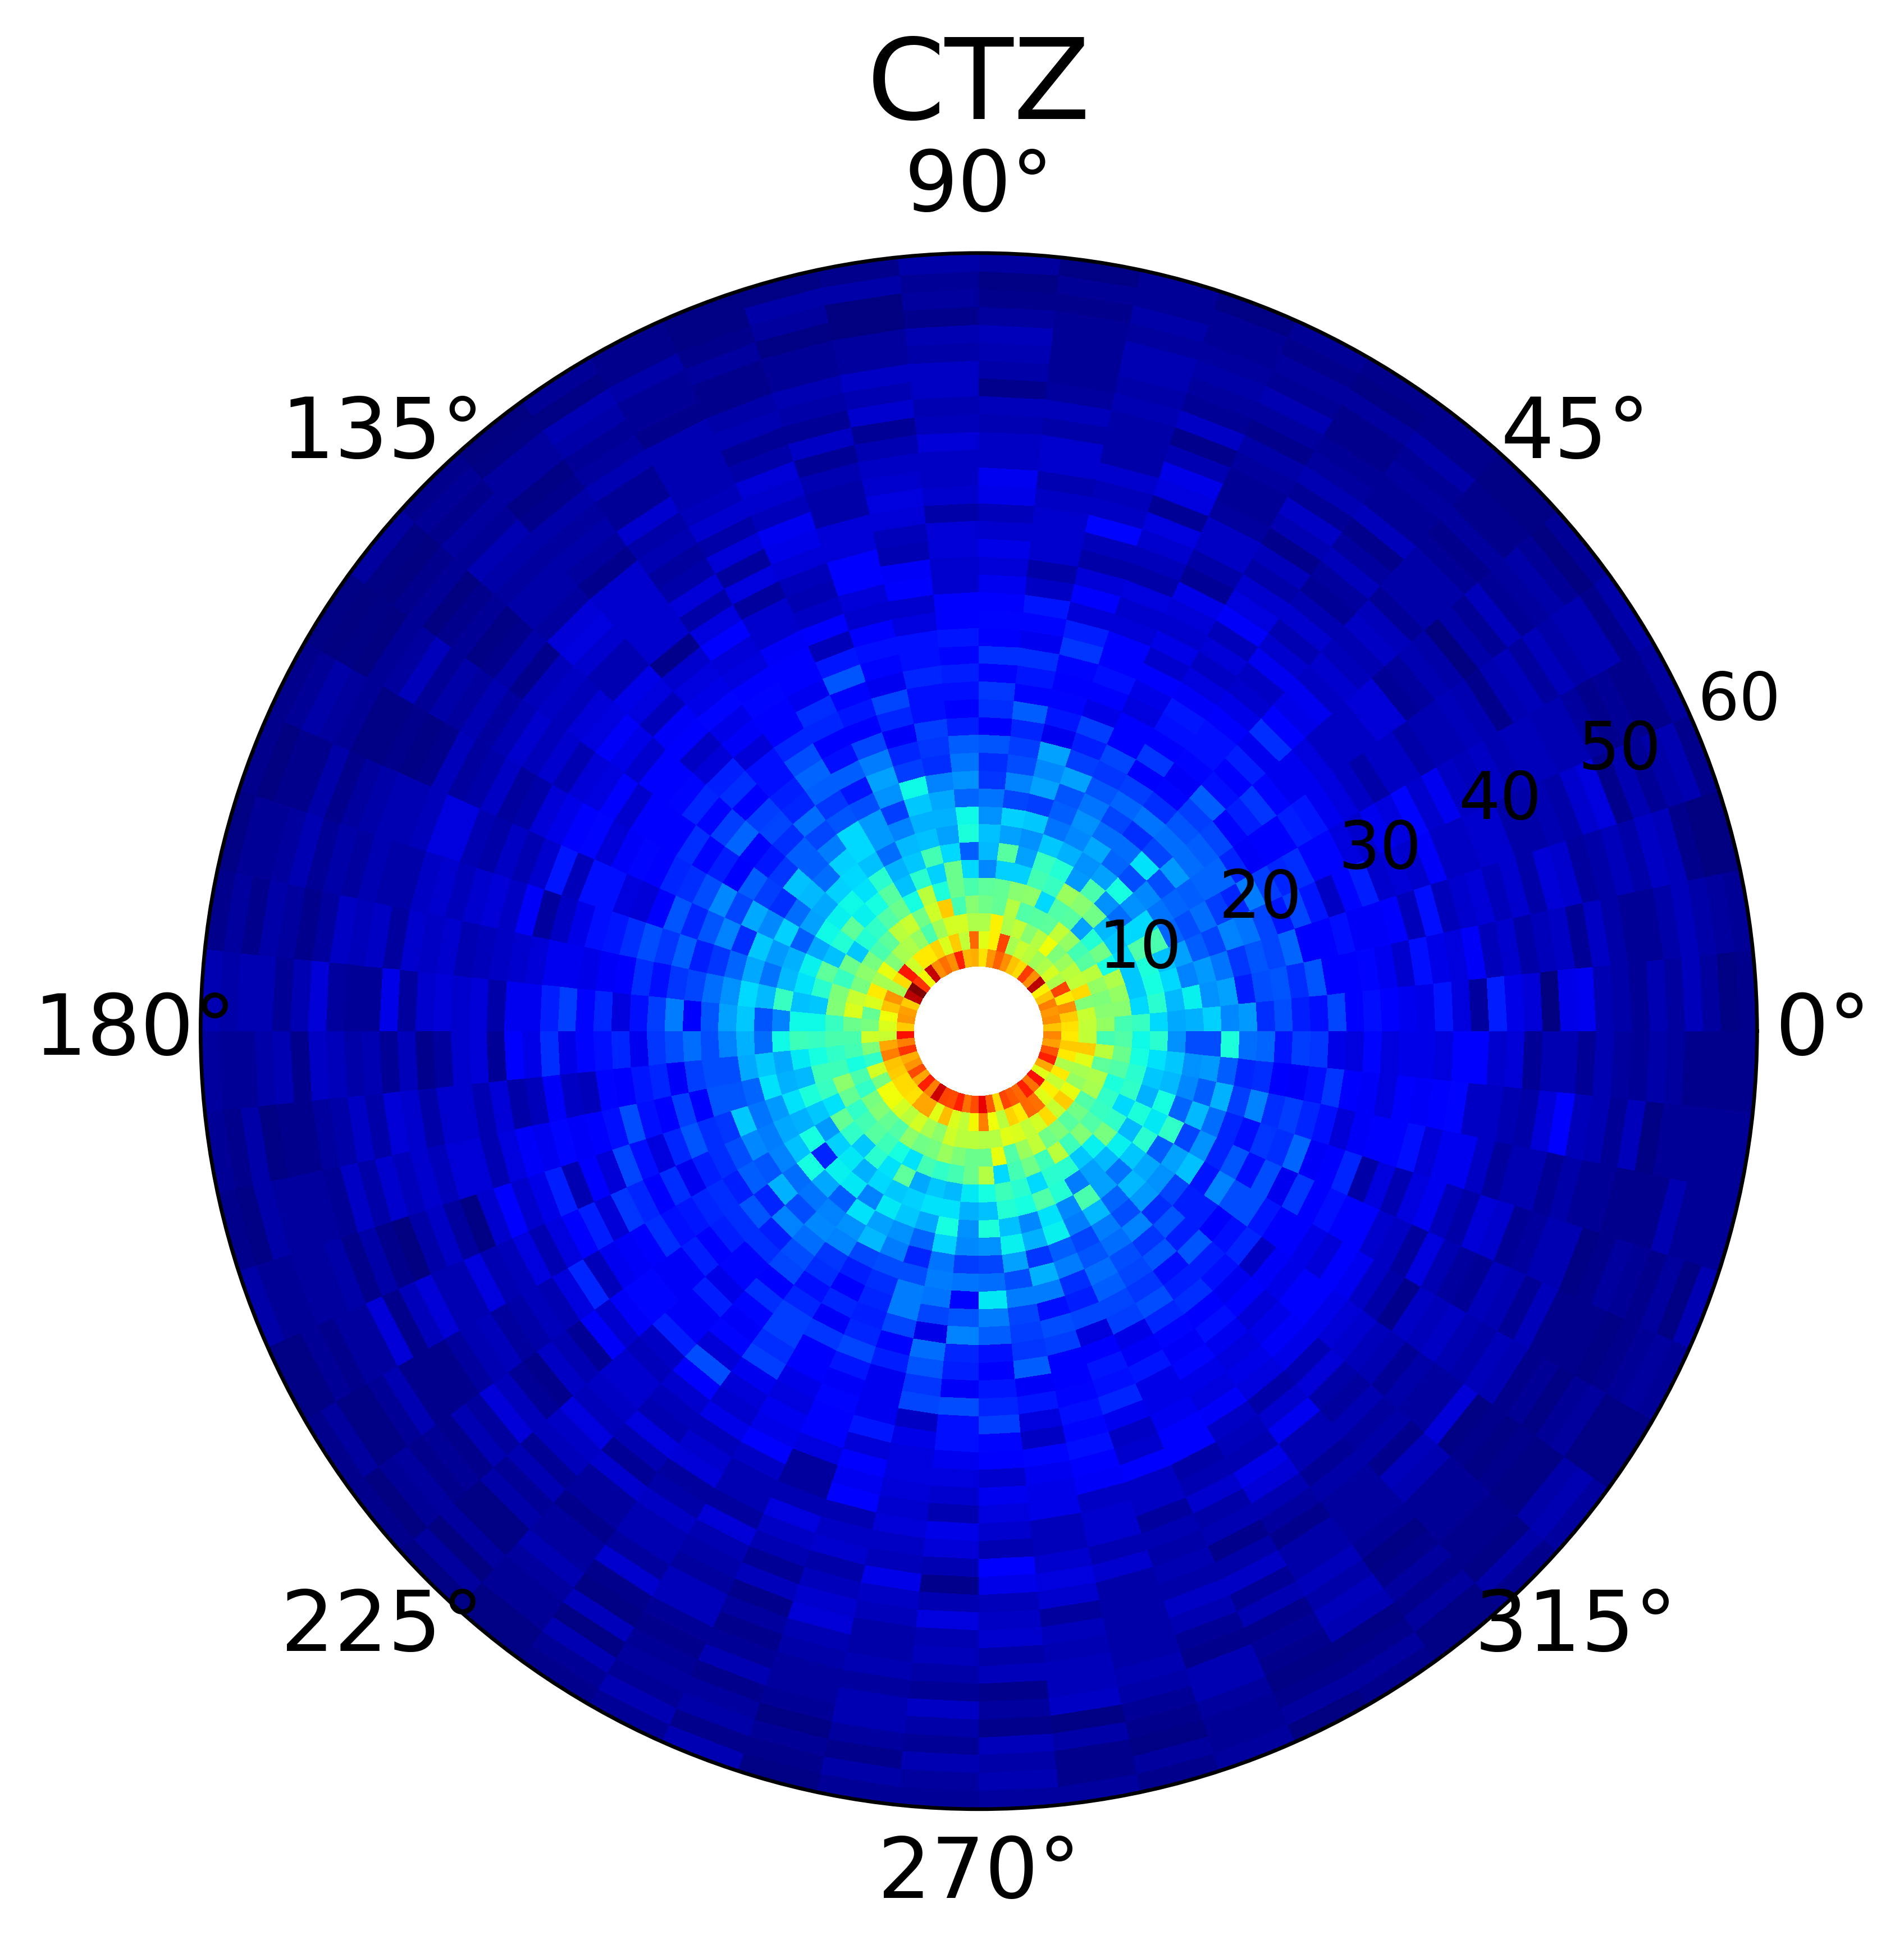

In [7]:
# acceleration radial heat map
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt

x, y = CombineData(all_raw_df)

VelocityPolarVector = PolarCoordinatesOfAngularVelocity(x, y)

VelocityPolarVector = VelocityPolarVector[VelocityPolarVector['dr'] >= 5]
VelocityPolarVector = VelocityPolarVector[VelocityPolarVector['dr'] <= 60]

plt.figure(figsize=(6, 6), dpi=600)

# 創建一個新的極座標子圖 
ax = plt.subplot(111, polar=True)

# 創建一個直方圖。注意，我們需要使用np.histogram2d來計算直方圖的bins和counts
counts, xedges, yedges = np.histogram2d(VelocityPolarVector['dtheta'], VelocityPolarVector['dr'], bins=[60, 40])

# 使用ax.pcolormesh來創建徑向熱圖
c = ax.pcolormesh(xedges, yedges, counts.T, cmap=plt.cm.jet)

# Change the font size of the angle labels
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=14)


# 添加顏色條
plt.ylim(0, 60)
plt.title('CTZ', size=24)
plt.show()

In [164]:
x, y = CombineData(all_raw_df)

In [165]:
def bin_average(df, bin_size=5):
    """
    將數據按 bin_size 分組，計算每組的平均值。
    
    Args:
        df (pd.DataFrame): 原始數據，包含多列數值。
        bin_size (int): 每組包含的數據點數量。
    
    Returns:
        pd.DataFrame: 平均值處理後的數據。
    """
    # 確保行數是 bin_size 的倍數，多餘的行會被捨去
    n_bins = len(df) // bin_size
    truncated_df = df.iloc[:n_bins * bin_size]

    # 重新分組，每 bin_size 行作為一組
    binned_df = truncated_df.groupby(truncated_df.index // bin_size).mean()

    return binned_df.reset_index(drop=True)

df1 = pd.DataFrame({'x': x, 'y': y})

# 對數據進行 binning 平均
df1_filtered = bin_average(df1, bin_size=5)



In [161]:
df2 = pd.DataFrame({'x': x, 'y': y})

# 對數據進行 binning 平均
df2_filtered = bin_average(df2, bin_size=5)

In [17]:
# speed and acceleration
df1 = PolarCoordinatesOfAngularVelocity(x, y)

In [22]:
#取r, theta
df1_filtered = df1[['r', 'theta']]

In [39]:
#取dr, dtheta
df1_filtered = df1[['dr', 'dtheta']]

In [12]:
df2 = PolarCoordinatesOfAngularVelocity(x, y)

In [23]:
#取r, theta
df2_filtered = df2[['r', 'theta']]

In [38]:
#取dr, dtheta
df2_filtered = df2[['dr', 'dtheta']]

In [ ]:
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
from tqdm import tqdm

def energy_distance(df1, df2):
    X = df1.values.astype(np.float32)
    Y = df2.values.astype(np.float32)

    mean_XY = np.mean(cdist(X, Y, metric='euclidean'))
    mean_XX = np.mean(cdist(X, X, metric='euclidean'))
    mean_YY = np.mean(cdist(Y, Y, metric='euclidean'))

    return 2 * mean_XY - mean_XX - mean_YY

def permutation_test_with_progress(df1, df2, n_permutations=1000, n_jobs=-1):
    observed_distance = energy_distance(df1, df2)
    combined = pd.concat([df1, df2]).values.astype(np.float32)
    n_X = len(df1)

    def single_permutation(seed=None):
        np.random.seed(seed)
        idx = np.random.permutation(len(combined))
        permuted_X = combined[idx[:n_X]]
        permuted_Y = combined[idx[n_X:]]
        return energy_distance(pd.DataFrame(permuted_X), pd.DataFrame(permuted_Y))

    permuted_distances = Parallel(n_jobs=n_jobs)(
        delayed(single_permutation)(seed) for seed in tqdm(range(n_permutations), desc="Running permutations")
    )

    p_value = np.mean(np.array(permuted_distances) >= observed_distance)
    return observed_distance, p_value

# 假設 df1_filtered 和 df2_filtered 已經準備好
df1_sample = df1_filtered.sample(n=10000, random_state=1)
df2_sample = df2_filtered.sample(n=10000, random_state=1)

observed_distance, p_value = permutation_test_with_progress(df1_sample, df2_sample, n_permutations=1000)

print(f"Energy Distance: {observed_distance}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("結果顯著：兩組分佈有顯著差異")
else:
    print("結果不顯著：無法拒絕零假設，分佈可能相同")


Running permutations: 100%|██████████| 1000/1000 [00:01<00:00, 728.79it/s]


Energy Distance: 5.471647252427431
P-value: 0.0
結果顯著：兩組分佈有顯著差異


In [168]:
df1_sample = df1_filtered.sample(n=10000, random_state=1)
df2_sample = df2_filtered.sample(n=10000, random_state=1)

combined = pd.concat([df1_sample, df2_sample]).values.astype(np.float32)
n_X = len(df1_sample)

np.random.seed(None)
idx = np.random.permutation(len(combined))
permuted_X = pd.DataFrame(combined[idx[:n_X]])
permuted_Y = pd.DataFrame(combined[idx[n_X:]])
print(energy_distance(df1_sample, df2_sample))
energy_distance(permuted_X, permuted_Y)

5.233641124474559


0.036856064028711444

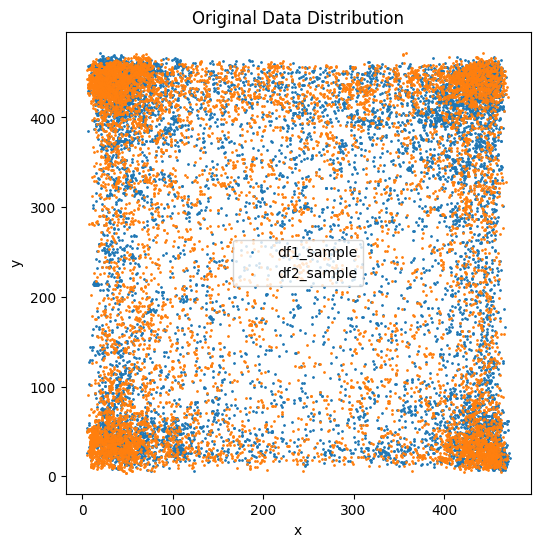

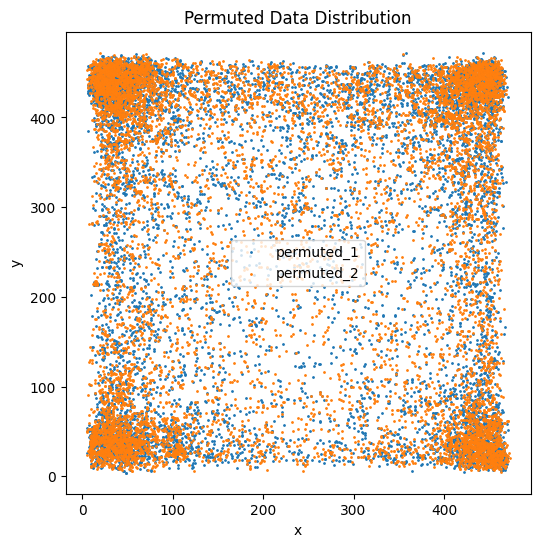

In [169]:
#plot df1_sample and df2_sample

import matplotlib.pyplot as plt

df1_sample = df1_filtered.sample(n=10000, random_state=42)
df2_sample = df2_filtered.sample(n=10000, random_state=42)

combined = pd.concat([df1_sample, df2_sample]).values.astype(np.float32)
n_X = len(df1_sample)

np.random.seed(None)
idx = np.random.permutation(len(combined))
permuted_X = pd.DataFrame(combined[idx[:n_X]])
permuted_Y = pd.DataFrame(combined[idx[n_X:]])


#1: 原始數據分佈
plt.figure(figsize=(6, 6))
plt.scatter(df1_sample['x'], df1_sample['y'],  s=1, label='df1_sample')
plt.scatter(df2_sample['x'], df2_sample['y'], s=1, label='df2_sample')
plt.legend()
plt.title("Original Data Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# 圖片 2: 置換後數據分佈
plt.figure(figsize=(6, 6))
plt.scatter(x = permuted_X[0], y = permuted_X[1], s=1, label='permuted_1')
plt.scatter(x = permuted_Y[0], y = permuted_Y[1], s=1, label='permuted_2')
plt.legend()
plt.title("Permuted Data Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.show()





#空間分布

#random_state = 1
#10000
Running permutations: 100%|██████████| 1000/1000 [03:47<00:00,  4.39it/s]
Energy Distance: 4.990916649421024
P-value: 0.0
結果顯著：兩組分佈有顯著差異


#random_state = 42
#10000
Running permutations: 100%|██████████| 1000/1000 [03:49<00:00,  4.36it/s]
Energy Distance: 5.740168063852195
P-value: 0.0
結果顯著：兩組分佈有顯著差異


#random_state = 69
#10000
Running permutations: 100%|██████████| 1000/1000 [03:48<00:00,  4.38it/s]
Energy Distance: 5.48100453939071
P-value: 0.0
結果顯著：兩組分佈有顯著差異


#random_state = 77
#10000
Running permutations: 100%|██████████| 1000/1000 [04:19<00:00,  3.85it/s]
Energy Distance: 5.0908901697186195
P-value: 0.0
結果顯著：兩組分佈有顯著差異


#random_state = 99
#10000
Running permutations: 100%|██████████| 1000/1000 [04:20<00:00,  3.84it/s]
Energy Distance: 5.027242690458053
P-value: 0.0
結果顯著：兩組分佈有顯著差異


#速度

#random_state = 1
#10000
Running permutations: 100%|██████████| 1000/1000 [03:51<00:00,  4.32it/s]
Energy Distance: 0.0051063930592043505
P-value: 0.302
結果不顯著：無法拒絕零假設，分佈可能相同

#random_state = 42
#5000
Running permutations: 100%|██████████| 1000/1000 [00:58<00:00, 16.97it/s]
Energy Distance: 0.005937061878775296
P-value: 0.571
結果不顯著：無法拒絕零假設，分佈可能相同

#10000
Running permutations: 100%|██████████| 1000/1000 [04:09<00:00,  4.01it/s]
Energy Distance: 0.0030512814516683306
P-value: 0.557
結果不顯著：無法拒絕零假設，分佈可能相同

#random_state = 69
#5000
Running permutations: 100%|██████████| 1000/1000 [00:57<00:00, 17.43it/s]
Energy Distance: 0.028642433798001576
P-value: 0.033
結果顯著：兩組分佈有顯著差異

#10000
Running permutations: 100%|██████████| 1000/1000 [04:01<00:00,  4.15it/s]
Energy Distance: 0.00575770598657499
P-value: 0.223
結果不顯著：無法拒絕零假設，分佈可能相同

#random_state = 77
#10000
Running permutations: 100%|██████████| 1000/1000 [03:47<00:00,  4.39it/s]
Energy Distance: 0.0069193637006890185
P-value: 0.197
結果不顯著：無法拒絕零假設，分佈可能相同

#random_state = 99
#10000
Running permutations: 100%|██████████| 1000/1000 [03:52<00:00,  4.30it/s]
Energy Distance: 0.006253309309968813
P-value: 0.219
結果不顯著：無法拒絕零假設，分佈可能相同

#加速度

#random_state = 1
#10000
Running permutations: 100%|██████████| 1000/1000 [03:52<00:00,  4.30it/s]
Energy Distance: 0.002190370600699154
P-value: 0.56
結果不顯著：無法拒絕零假設，分佈可能相同

#random_state = 42
#5000
Running permutations: 100%|██████████| 1000/1000 [03:03<00:00,  5.46it/s]
Energy Distance: 0.0023479461669921875
P-value: 0.243
結果不顯著：無法拒絕零假設，分佈可能相同

#10000
Running permutations: 100%|██████████| 1000/1000 [03:50<00:00,  4.34it/s]
Energy Distance: 0.002373081572327962
P-value: 0.472
結果不顯著：無法拒絕零假設，分佈可能相同

#random_state = 69
#10000
Running permutations: 100%|██████████| 1000/1000 [03:49<00:00,  4.35it/s]
Energy Distance: 0.005517359792879262
P-value: 0.095
結果不顯著：無法拒絕零假設，分佈可能相同

#random_state = 77
#10000
Running permutations: 100%|██████████| 1000/1000 [03:51<00:00,  4.32it/s]
Energy Distance: 0.005115509210069646
P-value: 0.16
結果不顯著：無法拒絕零假設，分佈可能相同

#random_state = 99
#10000
Running permutations: 100%|██████████| 1000/1000 [03:59<00:00,  4.17it/s]
Energy Distance: 0.0033810090497041756
P-value: 0.305
結果不顯著：無法拒絕零假設，分佈可能相同